# 5. Advanced Gradient Descent Optimizers - AdaGrad, RMSProp and Adam

### About this notebook

This notebook was used in the 50.039 Deep Learning course at the Singapore University of Technology and Design.

**Author:** Matthieu DE MARI (matthieu_demari@sutd.edu.sg)

**Version:** 1.0 (17/12/2022)

**Requirements:**
- Python 3 (tested on v3.9.6)
- Matplotlib (tested on v3.5.1)
- Numpy (tested on v1.22.1)

### Imports

In [1]:
# Matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
# Numpy
import numpy as np
# Removing unecessary warnings (optional, just makes notebook outputs more readable)
import warnings
warnings.filterwarnings("ignore")

### The problem with Vanilla GD

...

In [2]:
def obj_fun(val):
    a4 = 319/8400
    a3 = 43/4200
    a2 = -6799/8400
    a1 = -299/840
    a0 = 6
    return a4*val**4 + a3*val**3 + a2*val**2 + a1*val + a0

In [3]:
def obj_fun_deriv(val):
    a4 = 319/8400
    a3 = 43/4200
    a2 = -6799/8400
    a1 = -299/840
    return 4*a4*val**3 + 3*a3*val**2 + 2*a2*val + a1

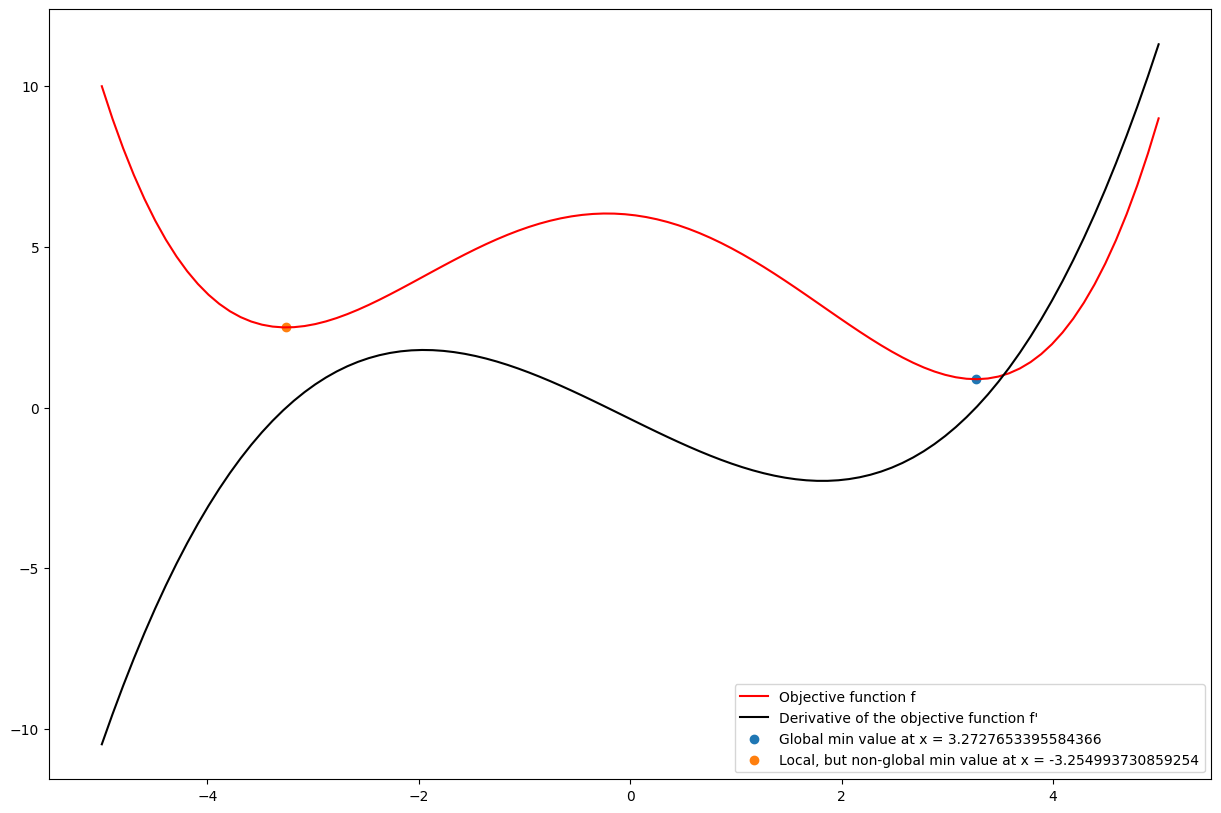

In [4]:
plt.figure(figsize = (15, 10))
x = np.linspace(-5, 5, 100)
y = [obj_fun(i) for i in x]
yp = [obj_fun_deriv(i) for i in x]
plt.plot(x, y, "r", label = "Objective function f")
plt.plot(x, yp, "k", label = "Derivative of the objective function f'")
approx_min_x = 3.2727653395584366
min_y = obj_fun(approx_min_x)
plt.scatter(approx_min_x, min_y, label = "Global min value at x = {}".format(approx_min_x))
approx_min_x2 = -3.254993730859254
min_y2 = obj_fun(approx_min_x2)
plt.scatter(approx_min_x2, min_y2, label = "Local, but non-global min value at x = {}".format(approx_min_x2))
plt.legend(loc = "best")
plt.show()

In [5]:
def vanilla_gd(start_val, alpha = 0.1, n_iter = 100):
    val = start_val
    list_vals = [val]
    for iter_num in range(n_iter):
        # Compute gradient and update value
        val -= alpha*obj_fun_deriv(val)
        list_vals.append(val)
    return val, list_vals

In [6]:
opt_val_vanilla_gd1, val_list_vanilla_gd1 = vanilla_gd(start_val = 5, alpha = 0.1, n_iter = 100)
print("Optimal, found by vanilla gd: ", opt_val_vanilla_gd1)
print("Global min: ", approx_min_x)
print("Local, non-global min: ", approx_min_x2)

Optimal, found by vanilla gd:  3.2727653395584366
Global min:  3.2727653395584366
Local, non-global min:  -3.254993730859254


In [7]:
opt_val_vanilla_gd2, val_list_vanilla_gd2 = vanilla_gd(start_val = -5, alpha = 0.1, n_iter = 100)
print("Optimal, found by vanilla gd: ", opt_val_vanilla_gd2)
print("Global min: ", approx_min_x)
print("Local, non-global min: ", approx_min_x2)

Optimal, found by vanilla gd:  -3.254993730859254
Global min:  3.2727653395584366
Local, non-global min:  -3.254993730859254


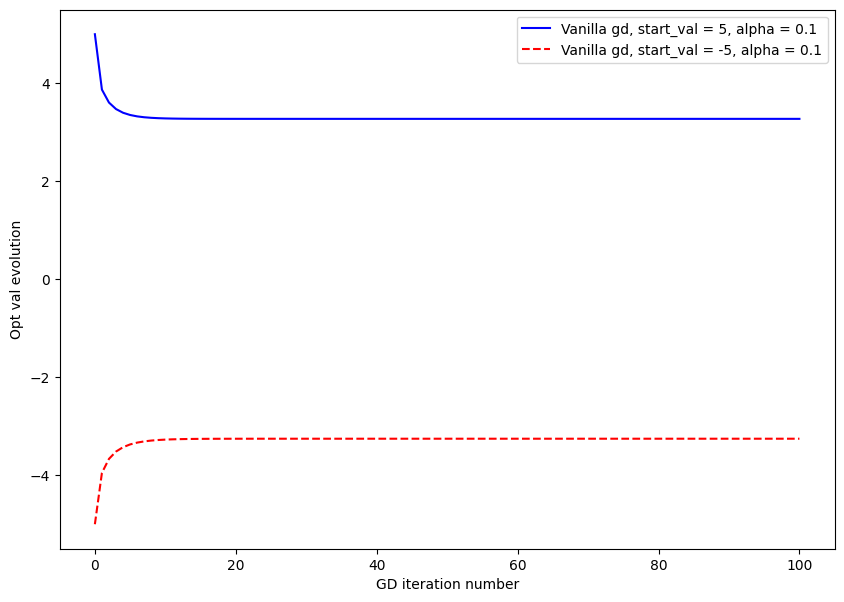

In [8]:
plt.figure(figsize = (10, 7))
plt.plot(range(len(val_list_vanilla_gd1)), val_list_vanilla_gd1, "b", label = "Vanilla gd, start_val = 5, alpha = 0.1")
plt.plot(range(len(val_list_vanilla_gd2)), val_list_vanilla_gd2, "r--", label = "Vanilla gd, start_val = -5, alpha = 0.1")
plt.xlabel("GD iteration number")
plt.ylabel("Opt val evolution")
plt.legend(loc = "best")
plt.show()

### Adding momentum to try and escape the local min

...

In [9]:
def momentum_gd(start_val, alpha = 0.1, mu = 0.1, n_iter = 100):
    val = start_val
    mom = 0
    list_vals = [val]
    for iter_num in range(n_iter):
        # Compute gradient and momentum
        grad = -alpha*obj_fun_deriv(val)
        mom = mu*mom + grad
        # Update value
        val += mom
        list_vals.append(val)
    return val, list_vals

In [10]:
opt_val_momentum_gd1, val_list_momentum_gd1 = momentum_gd(start_val = 5, alpha = 0.1, mu = 0.1, n_iter = 100)
print("Optimal, found by momentum gd: ", opt_val_momentum_gd1)
print("Global min: ", approx_min_x)
print("Local, non-global min: ", approx_min_x2)

Optimal, found by momentum gd:  3.272765339558436
Global min:  3.2727653395584366
Local, non-global min:  -3.254993730859254


In [11]:
opt_val_momentum_gd2, val_list_momentum_gd2 = momentum_gd(start_val = -5, alpha = 0.1, mu = 0.1, n_iter = 100)
print("Optimal, found by momentum gd: ", opt_val_momentum_gd2)
print("Global min: ", approx_min_x)
print("Local, non-global min: ", approx_min_x2)

Optimal, found by momentum gd:  -3.254993730859254
Global min:  3.2727653395584366
Local, non-global min:  -3.254993730859254


In [12]:
opt_val_momentum_gd3, val_list_momentum_gd3 = momentum_gd(start_val = -5, alpha = 0.1, mu = 0.9, n_iter = 100)
print("Optimal, found by momentum gd: ", opt_val_momentum_gd3)
print("Global min: ", approx_min_x)
print("Local, non-global min: ", approx_min_x2)

Optimal, found by momentum gd:  3.267681061691328
Global min:  3.2727653395584366
Local, non-global min:  -3.254993730859254


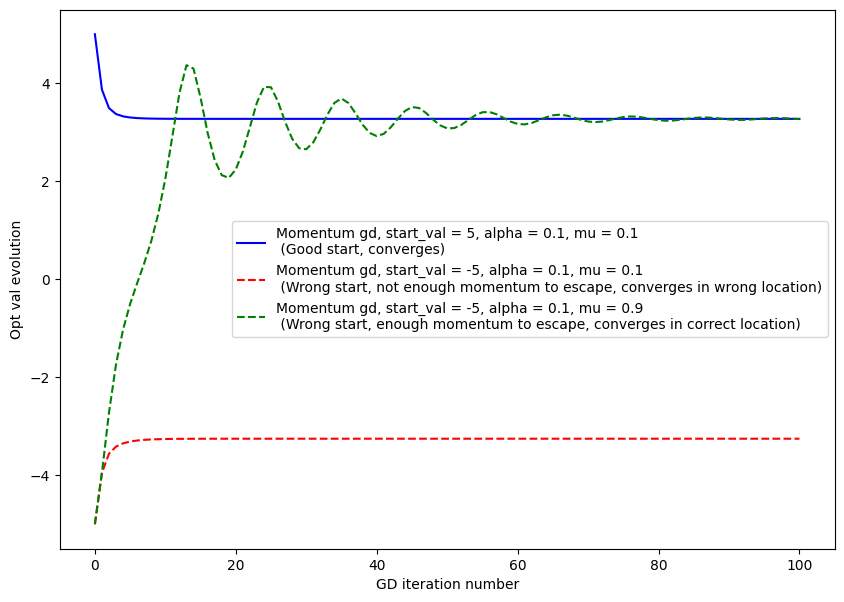

In [13]:
plt.figure(figsize = (10, 7))
label1 = "Momentum gd, start_val = 5, alpha = 0.1, mu = 0.1"
label1 += " \n (Good start, converges)"
plt.plot(range(len(val_list_momentum_gd1)), val_list_momentum_gd1, "b", label = label1)
label2 = "Momentum gd, start_val = -5, alpha = 0.1, mu = 0.1"
label2 += " \n (Wrong start, not enough momentum to escape, converges in wrong location)"
plt.plot(range(len(val_list_momentum_gd2)), val_list_momentum_gd2, "r--", label = label2)
label3 = "Momentum gd, start_val = -5, alpha = 0.1, mu = 0.9"
label3 += " \n (Wrong start, enough momentum to escape, converges in correct location)"
plt.plot(range(len(val_list_momentum_gd3)), val_list_momentum_gd3, "g--", label = label3)
plt.xlabel("GD iteration number")
plt.ylabel("Opt val evolution")
plt.legend(loc = "best")
plt.show()

### A variation on momentum, the Nesterov Accelerated Gradient (NAG)

Nesterov accelerated gradient descent (NAG) is a variant of stochastic gradient descent that can help accelerate convergence and improve the optimization of deep learning models. It does this by incorporating the concept of momentum, although in a slightly different way than before, which helps the optimization algorithm to continue moving in the same direction even if the gradients change.

In [14]:
def nesterov_gd(start_val, alpha = 0.1, mu = 0.1, n_iter = 100):
    val = start_val
    mom = 0
    list_vals = [val]
    for iter_num in range(n_iter):
        # Compute gradient and Nesterov momentum
        grad = -alpha*obj_fun_deriv(val)
        mom = mu*mom + grad
        # Update value
        val += mu*mom + grad
        list_vals.append(val)
    return val, list_vals

In [15]:
opt_val_nesterov_gd1, val_list_nesterov_gd1 = nesterov_gd(start_val = 5, alpha = 0.1, mu = 0.1, n_iter = 100)
print("Optimal, found by Nesterov gd: ", opt_val_nesterov_gd1)
print("Global min: ", approx_min_x)
print("Local, non-global min: ", approx_min_x2)

Optimal, found by Nesterov gd:  3.2727653395584366
Global min:  3.2727653395584366
Local, non-global min:  -3.254993730859254


In [16]:
opt_val_nesterov_gd2, val_list_nesterov_gd2 = nesterov_gd(start_val = -5, alpha = 0.1, mu = 0.1, n_iter = 100)
print("Optimal, found by Nesterov gd: ", opt_val_nesterov_gd2)
print("Global min: ", approx_min_x)
print("Local, non-global min: ", approx_min_x2)

Optimal, found by Nesterov gd:  -3.254993730859254
Global min:  3.2727653395584366
Local, non-global min:  -3.254993730859254


In [17]:
opt_val_nesterov_gd3, val_list_nesterov_gd3 = nesterov_gd(start_val = -5, alpha = 0.2, mu = 0.9, n_iter = 100)
print("Optimal, found by Nesterov gd: ", opt_val_nesterov_gd3)
print("Global min: ", approx_min_x)
print("Local, non-global min: ", approx_min_x2)

Optimal, found by Nesterov gd:  3.2727653395584357
Global min:  3.2727653395584366
Local, non-global min:  -3.254993730859254


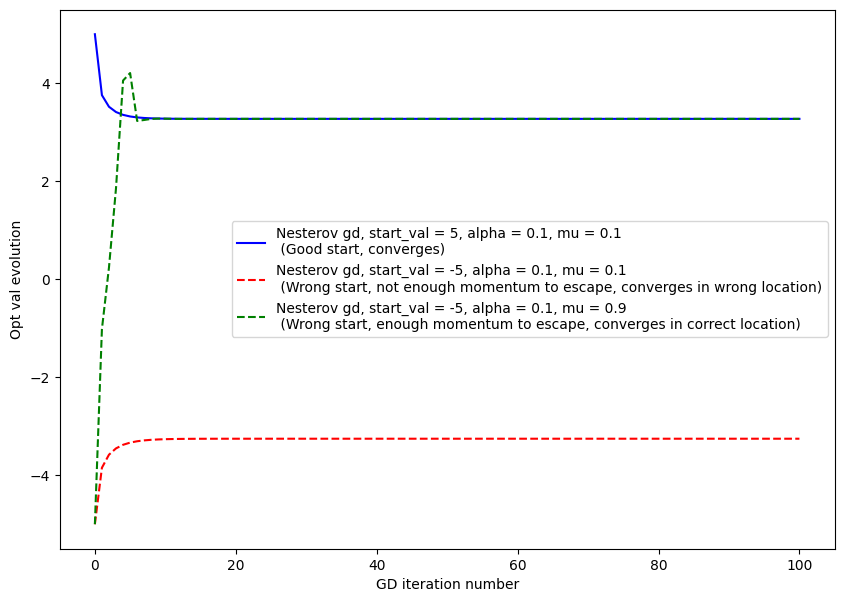

In [18]:
plt.figure(figsize = (10, 7))
label1 = "Nesterov gd, start_val = 5, alpha = 0.1, mu = 0.1"
label1 += " \n (Good start, converges)"
plt.plot(range(len(val_list_nesterov_gd1)), val_list_nesterov_gd1, "b", label = label1)
label2 = "Nesterov gd, start_val = -5, alpha = 0.1, mu = 0.1"
label2 += " \n (Wrong start, not enough momentum to escape, converges in wrong location)"
plt.plot(range(len(val_list_nesterov_gd1)), val_list_nesterov_gd2, "r--", label = label2)
label3 = "Nesterov gd, start_val = -5, alpha = 0.1, mu = 0.9"
label3 += " \n (Wrong start, enough momentum to escape, converges in correct location)"
plt.plot(range(len(val_list_nesterov_gd1)), val_list_nesterov_gd3, "g--", label = label3)
plt.xlabel("GD iteration number")
plt.ylabel("Opt val evolution")
plt.legend(loc = "best")
plt.show()

### Using a simple learning rate decay in Vanilla GD

...

In [19]:
def vanilla_gd_lrdecay(start_val, alpha = 0.1, alpha_decay_fac = 0.99, n_iter = 100):
    val = start_val
    list_vals = [val]
    for iter_num in range(n_iter):
        # Decay on LR
        alpha *= alpha_decay_fac
        # Update value
        val += -alpha*obj_fun_deriv(val)
        list_vals.append(val)
    return val, list_vals

In [20]:
opt_val_lrdecay_gd1, val_list_lrdecay_gd1 = vanilla_gd_lrdecay(start_val = 5, \
                                                              alpha = 0.2, \
                                                              alpha_decay_fac = 1, \
                                                              n_iter = 100)
print("Optimal, found by Vanilla LR decay gd: ", opt_val_lrdecay_gd1)
print("Global min: ", approx_min_x)
print("Local, non-global min: ", approx_min_x2)

Optimal, found by Vanilla LR decay gd:  3.272765339558436
Global min:  3.2727653395584366
Local, non-global min:  -3.254993730859254


In [21]:
opt_val_lrdecay_gd2, val_list_lrdecay_gd2 = vanilla_gd_lrdecay(start_val = 5, \
                                                               alpha = 0.2, \
                                                               alpha_decay_fac = 0.75, \
                                                               n_iter = 100)
print("Optimal, found by Vanilla LR decay gd: ", opt_val_lrdecay_gd2)
print("Global min: ", approx_min_x)
print("Local, non-global min: ", approx_min_x2)

Optimal, found by Vanilla LR decay gd:  3.2779747340306966
Global min:  3.2727653395584366
Local, non-global min:  -3.254993730859254


In [22]:
opt_val_lrdecay_gd3, val_list_lrdecay_gd3 = vanilla_gd_lrdecay(start_val = 5, \
                                                               alpha = 0.2, \
                                                               alpha_decay_fac = 0.5, \
                                                               n_iter = 100)
print("Optimal, found by Vanilla LR decay gd: ", opt_val_lrdecay_gd3)
print("Global min: ", approx_min_x)
print("Local, non-global min: ", approx_min_x2)

Optimal, found by Vanilla LR decay gd:  3.6473725891985467
Global min:  3.2727653395584366
Local, non-global min:  -3.254993730859254


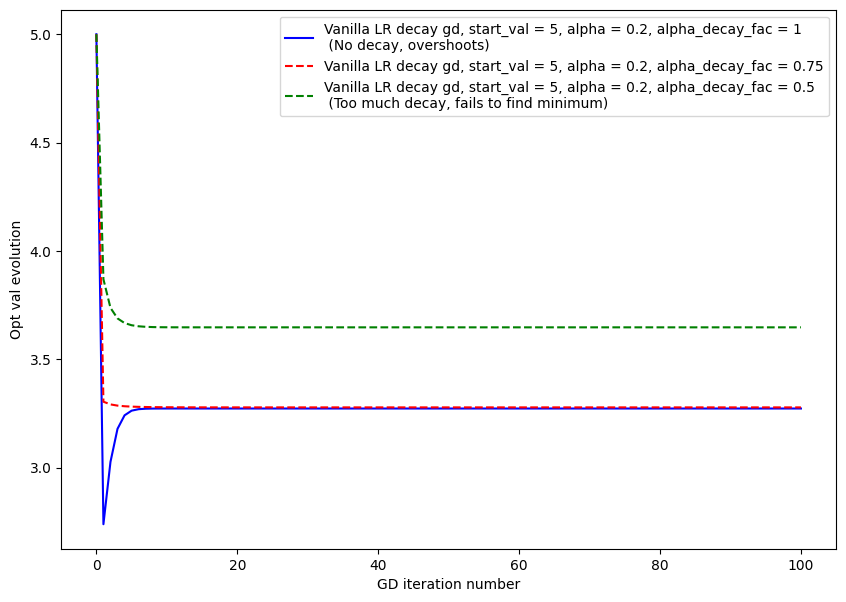

In [23]:
plt.figure(figsize = (10, 7))
label1 = "Vanilla LR decay gd, start_val = 5, alpha = 0.2, alpha_decay_fac = 1"
label1 += " \n (No decay, overshoots)"
plt.plot(range(len(val_list_lrdecay_gd1)), val_list_lrdecay_gd1, "b", label = label1)
label2 = "Vanilla LR decay gd, start_val = 5, alpha = 0.2, alpha_decay_fac = 0.75"
label1 += " \n (Optimal decay?)"
plt.plot(range(len(val_list_lrdecay_gd2)), val_list_lrdecay_gd2, "r--", label = label2)
label3 = "Vanilla LR decay gd, start_val = 5, alpha = 0.2, alpha_decay_fac = 0.5"
label3 += " \n (Too much decay, fails to find minimum)"
plt.plot(range(len(val_list_lrdecay_gd3)), val_list_lrdecay_gd3, "g--", label = label3)
plt.xlabel("GD iteration number")
plt.ylabel("Opt val evolution")
plt.legend(loc = "best")
plt.show()

### Dome additional examples of decay functions

Many other functions can be used to produce a decay on the learning rate. Below are a few notable examples.

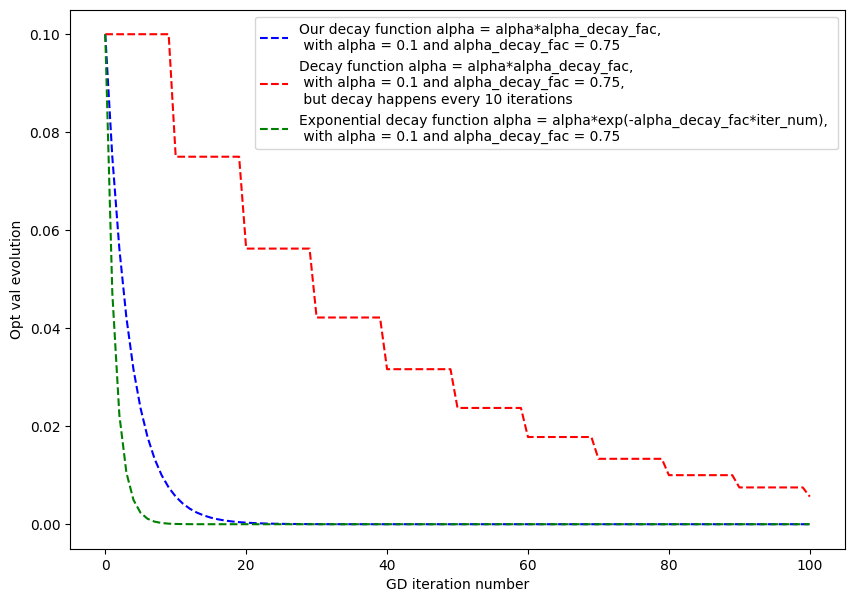

In [24]:
plt.figure(figsize = (10, 7))
label1 = "Our decay function alpha = alpha*alpha_decay_fac,"
label1 += " \n with alpha = 0.1 and alpha_decay_fac = 0.75"
plt.plot(range(101), [0.1*(0.75)**i for i in range(101)], "b--", label = label1)
label2 = "Decay function alpha = alpha*alpha_decay_fac,"
label2 += " \n with alpha = 0.1 and alpha_decay_fac = 0.75,"
label2 += " \n but decay happens every 10 iterations"
plt.plot(range(101), [0.1*(0.75)**(i//10) for i in range(101)], "r--", label = label2)
label3 = "Exponential decay function alpha = alpha*exp(-alpha_decay_fac*iter_num),"
label3 += " \n with alpha = 0.1 and alpha_decay_fac = 0.75"
plt.plot(range(101), [0.1*np.exp(-0.75*i) for i in range(101)], "g--", label = label3)
plt.xlabel("GD iteration number")
plt.ylabel("Opt val evolution")
plt.legend(loc = "best")
plt.show()

### Using a gradient-based learning rate decay in Vanilla GD

...

In [25]:
def vanilla_gd_gradlrdecay(start_val, alpha = 0.1, alpha_decay_fac = 0.99, n_iter = 100):
    val = start_val
    list_vals = [val]
    for iter_num in range(n_iter):
        # Compute gradients
        grad = obj_fun_deriv(val)
        # Gradient-based decay on LR
        alpha *= 1/(1 + alpha_decay_fac*np.sqrt(np.abs(grad)))
        # Update value
        val += -alpha*grad
        list_vals.append(val)
    return val, list_vals

In [26]:
opt_val_gradlrdecay_gd1, val_list_gradlrdecay_gd1 = vanilla_gd_gradlrdecay(start_val = 5, \
                                                                           alpha = 0.2, \
                                                                           alpha_decay_fac = 0.1, \
                                                                           n_iter = 100)
print("Optimal, found by Vanilla LR grad-decay gd: ", opt_val_gradlrdecay_gd1)
print("Global min: ", approx_min_x)
print("Local, non-global min: ", approx_min_x2)

Optimal, found by Vanilla LR grad-decay gd:  3.272765339558436
Global min:  3.2727653395584366
Local, non-global min:  -3.254993730859254


In [27]:
opt_val_gradlrdecay_gd2, val_list_gradlrdecay_gd2 = vanilla_gd_gradlrdecay(start_val = 5, \
                                                                           alpha = 0.2, \
                                                                           alpha_decay_fac = 0, \
                                                                           n_iter = 100)
print("Optimal, found by Vanilla LR grad-decay gd: ", opt_val_gradlrdecay_gd2)
print("Global min: ", approx_min_x)
print("Local, non-global min: ", approx_min_x2)

Optimal, found by Vanilla LR grad-decay gd:  3.272765339558436
Global min:  3.2727653395584366
Local, non-global min:  -3.254993730859254


In [28]:
opt_val_gradlrdecay_gd3, val_list_gradlrdecay_gd3 = vanilla_gd_gradlrdecay(start_val = 5, \
                                                                           alpha = 0.2, \
                                                                           alpha_decay_fac = 0.05, \
                                                                           n_iter = 100)
print("Optimal, found by Vanilla LR grad-decay gd: ", opt_val_gradlrdecay_gd3)
print("Global min: ", approx_min_x)
print("Local, non-global min: ", approx_min_x2)

Optimal, found by Vanilla LR grad-decay gd:  3.272765339558436
Global min:  3.2727653395584366
Local, non-global min:  -3.254993730859254


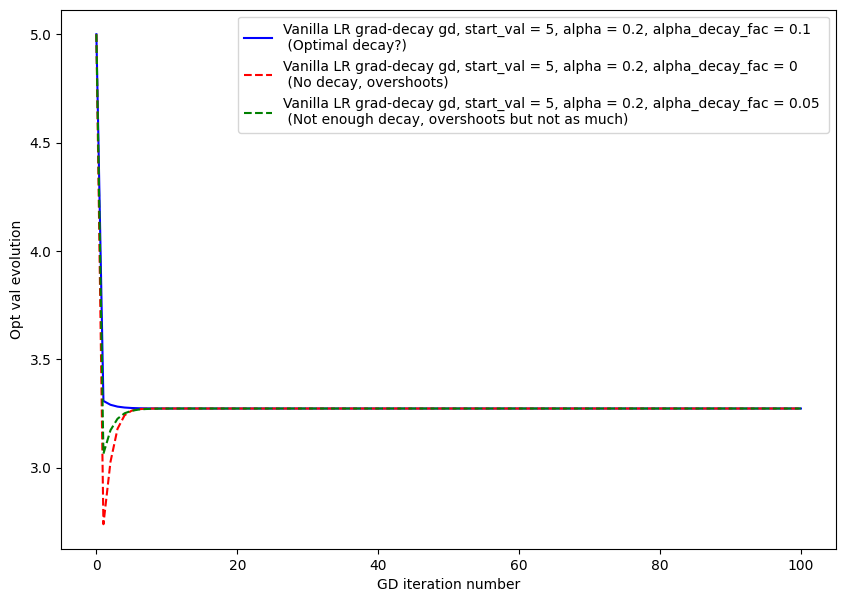

In [29]:
plt.figure(figsize = (10, 7))
label1 = "Vanilla LR grad-decay gd, start_val = 5, alpha = 0.2, alpha_decay_fac = 0.1"
label1 += " \n (Optimal decay?)"
plt.plot(range(len(val_list_gradlrdecay_gd1)), val_list_gradlrdecay_gd1, "b", label = label1)
label2 = "Vanilla LR grad-decay gd, start_val = 5, alpha = 0.2, alpha_decay_fac = 0"
label2 += " \n (No decay, overshoots)"
plt.plot(range(len(val_list_gradlrdecay_gd2)), val_list_gradlrdecay_gd2, "r--", label = label2)
label3 = "Vanilla LR grad-decay gd, start_val = 5, alpha = 0.2, alpha_decay_fac = 0.05"
label3 += " \n (Not enough decay, overshoots but not as much)"
plt.plot(range(len(val_list_gradlrdecay_gd3)), val_list_gradlrdecay_gd3, "g--", label = label3)
plt.xlabel("GD iteration number")
plt.ylabel("Opt val evolution")
plt.legend(loc = "best")
plt.show()

### Mock dataset, with nonlinearity

As in the previous notebook.

In [30]:
# All helper functions
eps = 1e-5
min_val = -1 + eps
max_val = 1 - eps
def val(min_val, max_val):
    return round(np.random.uniform(min_val, max_val), 2)
def class_for_val(val1, val2):
    k = np.pi
    return int(val2 >= -1/4 + 3/4*np.sin(val1*k))
n_points = 1000
def create_dataset(n_points, min_val, max_val):
    val1_list = np.array([val(min_val, max_val) for _ in range(n_points)])
    val2_list = np.array([val(min_val, max_val) for _ in range(n_points)])
    inputs = np.array([[v1, v2] for v1, v2 in zip(val1_list, val2_list)])
    outputs = np.array([class_for_val(v1, v2) for v1, v2 in zip(val1_list, val2_list)]).reshape(n_points, 1)
    return val1_list, val2_list, inputs, outputs

In [31]:
# Generate dataset
np.random.seed(47)
val1_list, val2_list, inputs, outputs = create_dataset(n_points, min_val, max_val)
# Check a few entries of the dataset
print(val1_list.shape)
print(val2_list.shape)
print(inputs.shape)
print(outputs.shape)
print(inputs[0:10, :])
print(outputs[0:10])

(1000,)
(1000,)
(1000, 2)
(1000, 1)
[[-0.77 -0.6 ]
 [ 0.95  0.28]
 [ 0.46 -0.91]
 [-0.3   0.23]
 [ 0.42 -0.61]
 [ 0.6   0.97]
 [ 0.29  0.37]
 [-0.17  0.4 ]
 [ 0.41  0.29]
 [-0.51  0.02]]
[[1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]]


As expected and observed in the plots below, the dataset now longer exhibits linearity. In fact the function is no longer polynomial either due to the presence of a logarithmic function.

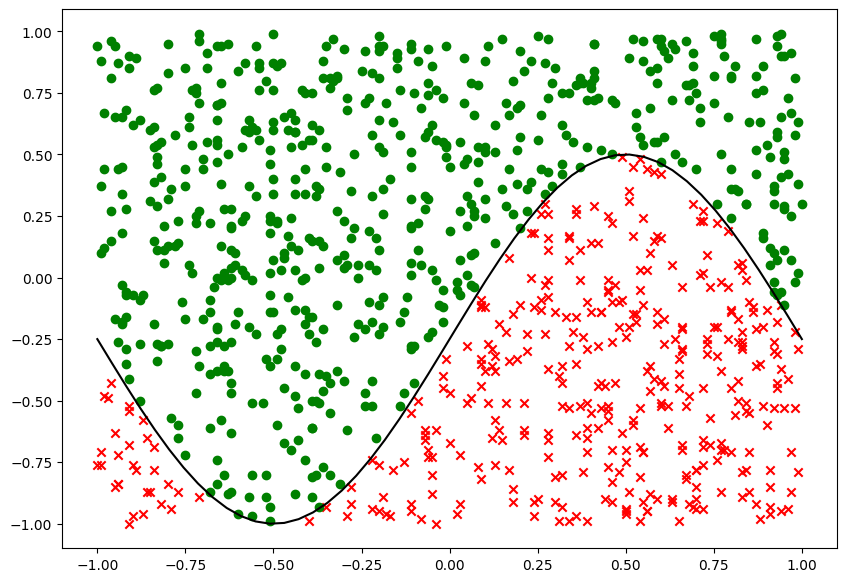

In [32]:
# Initialize plot
fig = plt.figure(figsize = (10, 7))

# Scatter plot
markers = {0: "x", 1: "o"}
colors = {0: "r", 1: "g"}
indexes_0 = np.where(outputs == 0)[0]
v1_0 = val1_list[indexes_0]
v2_0 = val2_list[indexes_0]
indexes_1 = np.where(outputs == 1)[0]
v1_1 = val1_list[indexes_1]
v2_1 = val2_list[indexes_1]
plt.scatter(v1_0, v2_0, c = colors[0], marker = markers[0])
plt.scatter(v1_1, v2_1, c = colors[1], marker = markers[1])
    
# Display true boundary
x1 = [v1 for v1 in np.linspace(min_val, max_val, 50)]
x2_true = [-1/4 + 3/4*np.sin(v1*np.pi) for v1 in x1]
plt.plot(x1, x2_true, "k", label = "True boundary")

# Show
plt.show()

### Shallow Neural Net with Sigmoid Activations, Vanilla Gradient Descent in Backprop

As in the previous notebook.

In [33]:
class ShallowNeuralNet_VanillaGD():
    
    def __init__(self, n_x, n_h, n_y):
        # Network dimensions
        self.n_x = n_x
        self.n_h = n_h
        self.n_y = n_y
        # Initialize parameters
        self.init_parameters_normal()
        # Loss, initialized as infinity before first calculation is made
        self.loss = float("Inf")
         
    def init_parameters_normal(self):
        # Weights and biases matrices (randomly initialized)
        self.W1 = np.random.randn(self.n_x, self.n_h)*0.1
        self.b1 = np.random.randn(1, self.n_h)*0.1
        self.W2 = np.random.randn(self.n_h, self.n_y)*0.1
        self.b2 = np.random.randn(1, self.n_y)*0.1

    def sigmoid(self, val):
        return 1/(1 + np.exp(-val))
    
    def forward(self, inputs):
        # Wx + b operation for the first layer
        Z1 = np.matmul(inputs, self.W1)
        Z1_b = Z1 + self.b1
        A1 = self.sigmoid(Z1_b)
        # Wx + b operation for the second layer
        Z2 = np.matmul(A1, self.W2)
        Z2_b = Z2 + self.b2
        y_pred = self.sigmoid(Z2_b)
        return y_pred
    
    def CE_loss(self, inputs, outputs):
        # MSE loss function as before
        outputs_re = outputs.reshape(-1, 1)
        pred = self.forward(inputs)
        eps = 1e-10
        losses = outputs*np.log(pred + eps) + (1 - outputs)*np.log(1 - pred + eps)
        self.loss = -np.sum(losses)/outputs.shape[0]
        return self.loss
    
    def backward(self, inputs, outputs, alpha = 1e-5):
        # Get the number of samples in dataset
        m = inputs.shape[0]
        
        # Forward propagate
        Z1 = np.matmul(inputs, self.W1)
        Z1_b = Z1 + self.b1
        A1 = self.sigmoid(Z1_b)
        Z2 = np.matmul(A1, self.W2)
        Z2_b = Z2 + self.b2
        y_pred = self.sigmoid(Z2_b)
    
        # Compute error term
        epsilon = y_pred - outputs
        gradient_output = epsilon*y_pred*(1 - y_pred)
        error_hidden = np.dot(gradient_output, self.W2.T)
        gradient_hidden = error_hidden*A1*(1 - A1)
        
        # Compute gradients
        grad_W2 = -(1/m)*np.dot(A1.T, gradient_output)
        grad_W1 = -(1/m)*np.dot(inputs.T, gradient_hidden)
        grad_b2 = -(1/m)*np.sum(gradient_output, axis = 0, keepdims = True)
        grad_b1 = -(1/m)*np.sum(gradient_hidden, axis = 0, keepdims = True)
        
        # Gradient descent update rules
        self.W2 += alpha*grad_W2
        self.W1 += alpha*grad_W1
        self.b2 += alpha*grad_b2
        self.b1 += alpha*grad_b1
        
        # Update loss
        self.CE_loss(inputs, outputs)
    
    def train(self, inputs, outputs, N_max = 1000, alpha = 1e-5, delta = 1e-5, display = True):
        # List of losses, starts with the current loss
        self.losses_list = [self.loss]
        # Repeat iterations
        for iteration_number in range(1, N_max + 1):
            # Backpropagate
            self.backward(inputs, outputs, alpha)
            new_loss = self.loss
            # Update losses list
            self.losses_list.append(new_loss)
            # Display
            if(display and iteration_number % (N_max//100) == 1):
                print("Iteration {} - Loss = {}".format(iteration_number, new_loss))
            # Check for beta value and early stop criterion
            difference = abs(self.losses_list[-1] - self.losses_list[-2])
            if(difference < delta):
                if(display):
                    print("Stopping early - loss evolution was less than delta on iteration {}.".format(iteration_number))
                break
        else:
            # Else on for loop will execute if break did not trigger
            if(display):
                print("Stopping - Maximal number of iterations reached.")
    
    def show_losses_over_training(self):
        # Initialize matplotlib
        fig, axs = plt.subplots(1, 2, figsize = (15, 5))
        axs[0].plot(list(range(len(self.losses_list))), self.losses_list)
        axs[0].set_xlabel("Iteration number")
        axs[0].set_ylabel("Loss")
        axs[1].plot(list(range(len(self.losses_list))), self.losses_list)
        axs[1].set_xlabel("Iteration number")
        axs[1].set_ylabel("Loss (in logarithmic scale)")
        axs[1].set_yscale("log")
        # Display
        plt.show()

In [34]:
# Define neural network structure (random normal initialization)
n_x = 2
n_h = 10
n_y = 1
np.random.seed(37)
shallow_neural_net_vanilla = ShallowNeuralNet_VanillaGD(n_x, n_h, n_y)
# Train and show final loss
shallow_neural_net_vanilla.train(inputs, outputs, N_max = 100000, alpha = 1, delta = 1e-10, display = True)
print(shallow_neural_net_vanilla.loss)

Iteration 1 - Loss = 0.67548314787971
Iteration 1001 - Loss = 0.28072737362278427
Iteration 2001 - Loss = 0.27523233981483863
Iteration 3001 - Loss = 0.2715794387758241
Iteration 4001 - Loss = 0.2578281792849976
Iteration 5001 - Loss = 0.22995639891920455
Iteration 6001 - Loss = 0.20557271968108126
Iteration 7001 - Loss = 0.18677868418612198
Iteration 8001 - Loss = 0.17158920448704038
Iteration 9001 - Loss = 0.15882146531175143
Iteration 10001 - Loss = 0.14778463483643703
Iteration 11001 - Loss = 0.1380449481922617
Iteration 12001 - Loss = 0.12936537292867875
Iteration 13001 - Loss = 0.12158843142558817
Iteration 14001 - Loss = 0.11455903064624182
Iteration 15001 - Loss = 0.1081297888848309
Iteration 16001 - Loss = 0.10219596845845026
Iteration 17001 - Loss = 0.0967084156547189
Iteration 18001 - Loss = 0.09165379553581855
Iteration 19001 - Loss = 0.08702672142481314
Iteration 20001 - Loss = 0.0828141274432106
Iteration 21001 - Loss = 0.07899257388951719
Iteration 22001 - Loss = 0.07553

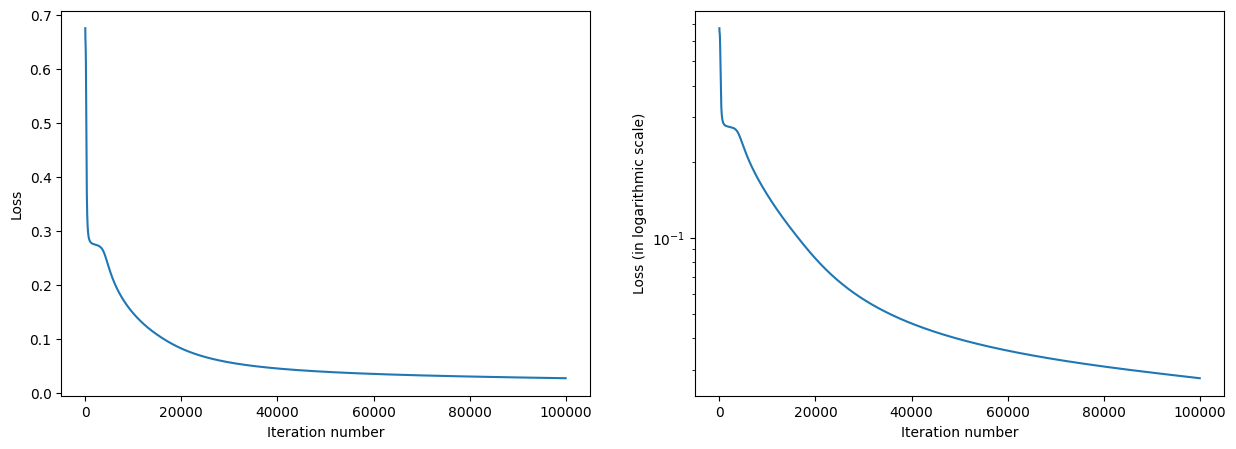

In [35]:
shallow_neural_net_vanilla.show_losses_over_training()

### Shallow Neural Net with Sigmoid Activations, AdaGrad in Backprop

AdaGrad: This variation of gradient descent adapts the learning rate for each parameter separately, based on the historical gradient information for that parameter. AdaGrad scales down the learning rate for parameters that have received a large number of updates, which can help prevent overfitting and improve the generalization ability of the model.

RMSProp: This variation of gradient descent is similar to AdaGrad, but it uses a running average of the squared gradients to scale the learning rate for each parameter, rather than using the sum of the squared gradients as in AdaGrad. RMSProp can be less sensitive to the learning rate than AdaGrad, and it is often used in conjunction with other techniques such as momentum.

Adam: This is a popular variation of gradient descent that combines the ideas of momentum and RMSProp. Adam uses an exponentially decaying average of the past gradients to scale the learning rate for each parameter, and it also uses an exponentially decaying average of the past squared gradients to scale the learning rate. Adam is widely used in deep learning applications because it can often achieve good performance with relatively little hyperparameter tuning.

In [36]:
class ShallowNeuralNet_AdaGrad():
    
    def __init__(self, n_x, n_h, n_y):
        # Network dimensions
        self.n_x = n_x
        self.n_h = n_h
        self.n_y = n_y
        # Initialize parameters
        self.init_parameters_normal()
        # Loss, initialized as infinity before first calculation is made
        self.loss = float("Inf")
         
    def init_parameters_normal(self):
        # Weights and biases matrices (randomly initialized)
        self.W1 = np.random.randn(self.n_x, self.n_h)*0.1
        self.b1 = np.random.randn(1, self.n_h)*0.1
        self.W2 = np.random.randn(self.n_h, self.n_y)*0.1
        self.b2 = np.random.randn(1, self.n_y)*0.1

    def sigmoid(self, val):
        return 1/(1 + np.exp(-val))
    
    def forward(self, inputs):
        # Wx + b operation for the first layer
        Z1 = np.matmul(inputs, self.W1)
        Z1_b = Z1 + self.b1
        A1 = self.sigmoid(Z1_b)
        # Wx + b operation for the second layer
        Z2 = np.matmul(A1, self.W2)
        Z2_b = Z2 + self.b2
        y_pred = self.sigmoid(Z2_b)
        return y_pred
    
    def CE_loss(self, inputs, outputs):
        # MSE loss function as before
        outputs_re = outputs.reshape(-1, 1)
        pred = self.forward(inputs)
        eps = 1e-10
        losses = outputs*np.log(pred + eps) + (1 - outputs)*np.log(1 - pred + eps)
        self.loss = -np.sum(losses)/outputs.shape[0]
        return self.loss
    
    def backward(self, inputs, outputs, G_list, alpha = 1e-5):
        # Get the number of samples in dataset
        m = inputs.shape[0]
        
        # Forward propagate
        Z1 = np.matmul(inputs, self.W1)
        Z1_b = Z1 + self.b1
        A1 = self.sigmoid(Z1_b)
        Z2 = np.matmul(A1, self.W2)
        Z2_b = Z2 + self.b2
        y_pred = self.sigmoid(Z2_b)
    
        # Compute error term
        epsilon = y_pred - outputs
        gradient_output = epsilon*y_pred*(1 - y_pred)
        error_hidden = np.dot(gradient_output, self.W2.T)
        gradient_hidden = error_hidden*A1*(1 - A1)
        
        # Compute gradients
        grad_W2 = -(1/m)*np.dot(A1.T, gradient_output)
        grad_W1 = -(1/m)*np.dot(inputs.T, gradient_hidden)
        grad_b2 = -(1/m)*np.sum(gradient_output, axis = 0, keepdims = True)
        grad_b1 = -(1/m)*np.sum(gradient_hidden, axis = 0, keepdims = True)
        
        # Momentum and gradient decay/normalization for each parameter
        G_W2, G_W1, G_b2, G_b1 = G_list
        G_W2 += grad_W2**2
        G_W1 += grad_W1**2
        G_b2 += grad_b2**2
        G_b1 += grad_b1**2
        G_list = [G_W2, G_W1, G_b2, G_b1]
        
        # Gradient descent update rules
        eps = 1e-6
        self.W2 += alpha*grad_W2/(np.sqrt(G_W2 + eps))
        self.W1 += alpha*grad_W1/(np.sqrt(G_W1 + eps))
        self.b2 += alpha*grad_b2/(np.sqrt(G_b2 + eps))
        self.b1 += alpha*grad_b1/(np.sqrt(G_b1 + eps))
        
        # Update loss
        self.CE_loss(inputs, outputs)
        return G_list
    
    def train(self, inputs, outputs, N_max = 1000, alpha = 1e-5, delta = 1e-5, display = True):
        # List of losses, starts with the current loss
        self.losses_list = [self.loss]
        # Initialize G_list
        G_list = [0*self.W2, 0*self.W1, 0*self.b2, 0*self.b1]
        # Repeat iterations
        for iteration_number in range(1, N_max + 1):
            # Backpropagate
            G_list = self.backward(inputs, outputs, G_list, alpha)
            new_loss = self.loss
            # Update losses list
            self.losses_list.append(new_loss)
            # Display
            if(display and iteration_number % (N_max//100) == 1):
                print("Iteration {} - Loss = {}".format(iteration_number, new_loss))
            # Check for delta value and early stop criterion
            difference = abs(self.losses_list[-1] - self.losses_list[-2])
            if(difference < delta):
                if(display):
                    print("Stopping early - loss evolution was less than delta on iteration {}.".format(iteration_number))
                break
        else:
            # Else on for loop will execute if break did not trigger
            if(display):
                print("Stopping - Maximal number of iterations reached.")
    
    def show_losses_over_training(self):
        # Initialize matplotlib
        fig, axs = plt.subplots(1, 2, figsize = (15, 5))
        axs[0].plot(list(range(len(self.losses_list))), self.losses_list)
        axs[0].set_xlabel("Iteration number")
        axs[0].set_ylabel("Loss")
        axs[1].plot(list(range(len(self.losses_list))), self.losses_list)
        axs[1].set_xlabel("Iteration number")
        axs[1].set_ylabel("Loss (in logarithmic scale)")
        axs[1].set_yscale("log")
        # Display
        plt.show()

In [37]:
# Define neural network structure (random normal initialization)
n_x = 2
n_h = 10
n_y = 1
np.random.seed(37)
shallow_neural_net_adagrad = ShallowNeuralNet_AdaGrad(n_x, n_h, n_y)
# Train and show final loss
shallow_neural_net_adagrad.train(inputs, outputs, N_max = 100000, alpha = 1, delta = 1e-10, display = True)
print(shallow_neural_net_adagrad.loss)

Iteration 1 - Loss = 2.227378977390921
Iteration 1001 - Loss = 0.030435740199821367
Iteration 2001 - Loss = 0.02124634890637233
Iteration 3001 - Loss = 0.016830590557575773
Iteration 4001 - Loss = 0.013413784320775533
Iteration 5001 - Loss = 0.011623092147470385
Iteration 6001 - Loss = 0.01044867607343477
Iteration 7001 - Loss = 0.009580575851311472
Iteration 8001 - Loss = 0.008899960099372762
Iteration 9001 - Loss = 0.008327156160164932
Iteration 10001 - Loss = 0.007819362088126489
Iteration 11001 - Loss = 0.007368813959839883
Iteration 12001 - Loss = 0.006980207274089861
Iteration 13001 - Loss = 0.006647858056939402
Iteration 14001 - Loss = 0.006362439958207539
Iteration 15001 - Loss = 0.006111027937806933
Iteration 16001 - Loss = 0.005882008297405737
Iteration 17001 - Loss = 0.005669813925956324
Iteration 18001 - Loss = 0.0054733489926671805
Iteration 19001 - Loss = 0.005292120384851883
Iteration 20001 - Loss = 0.005125097344244023
Iteration 21001 - Loss = 0.004970855135123894
Itera

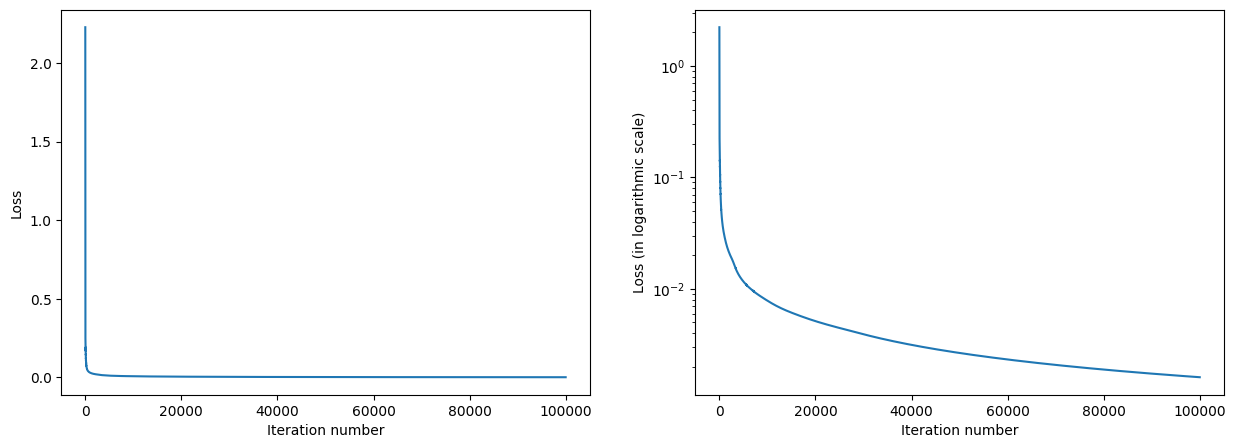

In [38]:
shallow_neural_net_adagrad.show_losses_over_training()

### Shallow Neural Net with Sigmoid Activations, RMSProp in Backprop

...

In [39]:
class ShallowNeuralNet_RMSProp():
    
    def __init__(self, n_x, n_h, n_y):
        # Network dimensions
        self.n_x = n_x
        self.n_h = n_h
        self.n_y = n_y
        # Initialize parameters
        self.init_parameters_normal()
        # Loss, initialized as infinity before first calculation is made
        self.loss = float("Inf")
         
    def init_parameters_normal(self):
        # Weights and biases matrices (randomly initialized)
        self.W1 = np.random.randn(self.n_x, self.n_h)*0.1
        self.b1 = np.random.randn(1, self.n_h)*0.1
        self.W2 = np.random.randn(self.n_h, self.n_y)*0.1
        self.b2 = np.random.randn(1, self.n_y)*0.1

    def sigmoid(self, val):
        return 1/(1 + np.exp(-val))
    
    def forward(self, inputs):
        # Wx + b operation for the first layer
        Z1 = np.matmul(inputs, self.W1)
        Z1_b = Z1 + self.b1
        A1 = self.sigmoid(Z1_b)
        # Wx + b operation for the second layer
        Z2 = np.matmul(A1, self.W2)
        Z2_b = Z2 + self.b2
        y_pred = self.sigmoid(Z2_b)
        return y_pred
    
    def CE_loss(self, inputs, outputs):
        # MSE loss function as before
        outputs_re = outputs.reshape(-1, 1)
        pred = self.forward(inputs)
        eps = 1e-10
        losses = outputs*np.log(pred + eps) + (1 - outputs)*np.log(1 - pred + eps)
        self.loss = -np.sum(losses)/outputs.shape[0]
        return self.loss
    
    def backward(self, inputs, outputs, G_list, alpha = 1e-5, rho = 0.1):
        # Get the number of samples in dataset
        m = inputs.shape[0]
        
        # Forward propagate
        Z1 = np.matmul(inputs, self.W1)
        Z1_b = Z1 + self.b1
        A1 = self.sigmoid(Z1_b)
        Z2 = np.matmul(A1, self.W2)
        Z2_b = Z2 + self.b2
        y_pred = self.sigmoid(Z2_b)
    
        # Compute error term
        epsilon = y_pred - outputs
        gradient_output = epsilon*y_pred*(1 - y_pred)
        error_hidden = np.dot(gradient_output, self.W2.T)
        gradient_hidden = error_hidden*A1*(1 - A1)
        
        # Compute gradients
        grad_W2 = -(1/m)*np.dot(A1.T, gradient_output)
        grad_W1 = -(1/m)*np.dot(inputs.T, gradient_hidden)
        grad_b2 = -(1/m)*np.sum(gradient_output, axis = 0, keepdims = True)
        grad_b1 = -(1/m)*np.sum(gradient_hidden, axis = 0, keepdims = True)
        
        # Momentum and gradient decay/normalization for each parameter
        G_W2, G_W1, G_b2, G_b1 = G_list
        G_W2 = rho*G_W2 + (1 - rho)*grad_W2**2
        G_W1 = rho*G_W1 + (1 - rho)*grad_W1**2
        G_b2 = rho*G_b2 + (1 - rho)*grad_b2**2
        G_b1 = rho*G_b1 + (1 - rho)*grad_b1**2
        G_list = [G_W2, G_W1, G_b2, G_b1]
        
        # Gradient descent update rules
        eps = 1e-6
        self.W2 += alpha*grad_W2/(np.sqrt(G_W2 + eps))
        self.W1 += alpha*grad_W1/(np.sqrt(G_W1 + eps))
        self.b2 += alpha*grad_b2/(np.sqrt(G_b2 + eps))
        self.b1 += alpha*grad_b1/(np.sqrt(G_b1 + eps))
        
        # Update loss
        self.CE_loss(inputs, outputs)
        return G_list
    
    def train(self, inputs, outputs, N_max = 1000, alpha = 1e-5, rho = 0.1, delta = 1e-5, display = True):
        # List of losses, starts with the current loss
        self.losses_list = [self.loss]
        # Initialize G_list
        G_list = [0*self.W2, 0*self.W1, 0*self.b2, 0*self.b1]
        # Repeat iterations
        for iteration_number in range(1, N_max + 1):
            # Backpropagate
            G_list = self.backward(inputs, outputs, G_list, alpha, rho)
            new_loss = self.loss
            # Update losses list
            self.losses_list.append(new_loss)
            # Display
            if(display and iteration_number % (N_max//100) == 1):
                print("Iteration {} - Loss = {}".format(iteration_number, new_loss))
            # Check for delta value and early stop criterion
            difference = abs(self.losses_list[-1] - self.losses_list[-2])
            if(difference < delta):
                if(display):
                    print("Stopping early - loss evolution was less than delta on iteration {}.".format(iteration_number))
                break
        else:
            # Else on for loop will execute if break did not trigger
            if(display):
                print("Stopping - Maximal number of iterations reached.")
    
    def show_losses_over_training(self):
        # Initialize matplotlib
        fig, axs = plt.subplots(1, 2, figsize = (15, 5))
        axs[0].plot(list(range(len(self.losses_list))), self.losses_list)
        axs[0].set_xlabel("Iteration number")
        axs[0].set_ylabel("Loss")
        axs[1].plot(list(range(len(self.losses_list))), self.losses_list)
        axs[1].set_xlabel("Iteration number")
        axs[1].set_ylabel("Loss (in logarithmic scale)")
        axs[1].set_yscale("log")
        # Display
        plt.show()

In [41]:
# Define neural network structure (random normal initialization)
n_x = 2
n_h = 10
n_y = 1
np.random.seed(37)
shallow_neural_net_rmsprop = ShallowNeuralNet_RMSProp(n_x, n_h, n_y)
# Train and show final loss
shallow_neural_net_rmsprop.train(inputs, outputs, N_max = 100000, alpha = 1e-1, rho = 0.1, delta = 1e-10, display = True)
print(shallow_neural_net_rmsprop.loss)

Iteration 1 - Loss = 0.6579736953325213
Iteration 1001 - Loss = 0.07163736867148578
Iteration 2001 - Loss = 0.03595334634111846
Iteration 3001 - Loss = 0.026369444254388207
Iteration 4001 - Loss = 0.020693448602257105
Iteration 5001 - Loss = 0.01672549594562156
Iteration 6001 - Loss = 0.014011476801858292
Iteration 7001 - Loss = 0.012132759120241537
Iteration 8001 - Loss = 0.010742341574688886
Iteration 9001 - Loss = 0.009675071977803817
Iteration 10001 - Loss = 0.008831578490735332
Iteration 11001 - Loss = 0.00814719550903587
Iteration 12001 - Loss = 0.00757894309075593
Iteration 13001 - Loss = 0.007097624410178777
Iteration 14001 - Loss = 0.006682806472686668
Iteration 15001 - Loss = 0.006319553841287064
Iteration 16001 - Loss = 0.005995965076673129
Iteration 17001 - Loss = 0.00570146862171887
Iteration 18001 - Loss = 0.005429075354780188
Iteration 19001 - Loss = 0.005178879004139285
Iteration 20001 - Loss = 0.004951217957165658
Iteration 21001 - Loss = 0.004743376797115018
Iteration

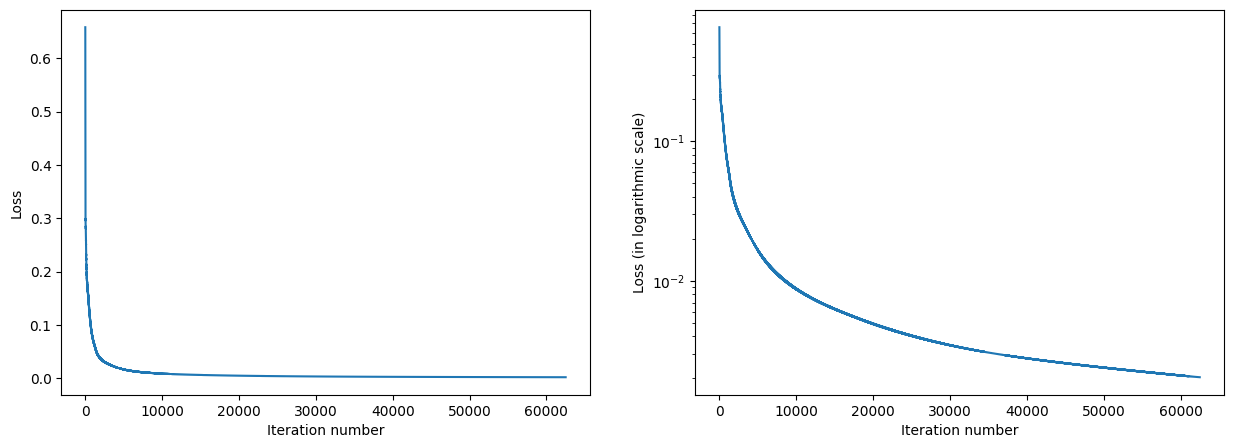

In [42]:
shallow_neural_net_rmsprop.show_losses_over_training()

### Shallow Neural Net with Sigmoid Activations, Adam in Backprop

...

In [43]:
class ShallowNeuralNet_Adam():
    
    def __init__(self, n_x, n_h, n_y):
        # Network dimensions
        self.n_x = n_x
        self.n_h = n_h
        self.n_y = n_y
        # Initialize parameters
        self.init_parameters_normal()
        # Loss, initialized as infinity before first calculation is made
        self.loss = float("Inf")
         
    def init_parameters_normal(self):
        # Weights and biases matrices (randomly initialized)
        self.W1 = np.random.randn(self.n_x, self.n_h)*0.1
        self.b1 = np.random.randn(1, self.n_h)*0.1
        self.W2 = np.random.randn(self.n_h, self.n_y)*0.1
        self.b2 = np.random.randn(1, self.n_y)*0.1

    def sigmoid(self, val):
        return 1/(1 + np.exp(-val))
    
    def forward(self, inputs):
        # Wx + b operation for the first layer
        Z1 = np.matmul(inputs, self.W1)
        Z1_b = Z1 + self.b1
        A1 = self.sigmoid(Z1_b)
        # Wx + b operation for the second layer
        Z2 = np.matmul(A1, self.W2)
        Z2_b = Z2 + self.b2
        y_pred = self.sigmoid(Z2_b)
        return y_pred
    
    def CE_loss(self, inputs, outputs):
        # MSE loss function as before
        outputs_re = outputs.reshape(-1, 1)
        pred = self.forward(inputs)
        eps = 1e-10
        losses = outputs*np.log(pred + eps) + (1 - outputs)*np.log(1 - pred + eps)
        self.loss = -np.sum(losses)/outputs.shape[0]
        return self.loss
    
    def backward(self, inputs, outputs, G_list, iteration_number, alpha = 1e-5, beta1 = 0.9, beta2 = 0.999):
        # Get the number of samples in dataset
        m = inputs.shape[0]
        
        # Forward propagate
        Z1 = np.matmul(inputs, self.W1)
        Z1_b = Z1 + self.b1
        A1 = self.sigmoid(Z1_b)
        Z2 = np.matmul(A1, self.W2)
        Z2_b = Z2 + self.b2
        y_pred = self.sigmoid(Z2_b)
    
        # Compute error term
        epsilon = y_pred - outputs
        gradient_output = epsilon*y_pred*(1 - y_pred)
        error_hidden = np.dot(gradient_output, self.W2.T)
        gradient_hidden = error_hidden*A1*(1 - A1)
        
        # Compute gradients
        grad_W2 = -(1/m)*np.dot(A1.T, gradient_output)
        grad_W1 = -(1/m)*np.dot(inputs.T, gradient_hidden)
        grad_b2 = -(1/m)*np.sum(gradient_output, axis = 0, keepdims = True)
        grad_b1 = -(1/m)*np.sum(gradient_hidden, axis = 0, keepdims = True)
        
        # Momentum and gradient decay/normalization for each parameter
        V_W2, V_W1, V_b2, V_b1, S_W2, S_W1, S_b2, S_b1 = G_list
        V_W2 = beta1*V_W2 + (1 - beta1)*grad_W2
        V_W1 = beta1*V_W1 + (1 - beta1)*grad_W1
        V_b2 = beta1*V_b2 + (1 - beta1)*grad_b2
        V_b1 = beta1*V_b1 + (1 - beta1)*grad_b1
        V_W2_norm = V_W2/(1 - beta1**iteration_number)
        V_W1_norm = V_W1/(1 - beta1**iteration_number)
        V_b2_norm = V_b2/(1 - beta1**iteration_number)
        V_b1_norm = V_b1/(1 - beta1**iteration_number)
        S_W2 = beta2*S_W2 + (1 - beta2)*grad_W2**2
        S_W1 = beta2*S_W1 + (1 - beta2)*grad_W1**2
        S_b2 = beta2*S_b2 + (1 - beta2)*grad_b2**2
        S_b1 = beta2*S_b1 + (1 - beta2)*grad_b1**2
        S_W2_norm = S_W2/(1 - beta2**iteration_number)
        S_W1_norm = S_W1/(1 - beta2**iteration_number)
        S_b2_norm = S_b2/(1 - beta2**iteration_number)
        S_b1_norm = S_b1/(1 - beta2**iteration_number)
        G_list = [V_W2, V_W1, V_b2, V_b1, S_W2, S_W1, S_b2, S_b1]
        
        # Gradient descent update rules
        eps = 1e-6
        self.W2 += alpha*V_W2_norm/(np.sqrt(S_W2_norm) + eps)
        self.W1 += alpha*V_W1_norm/(np.sqrt(S_W1_norm) + eps)
        self.b2 += alpha*V_b2_norm/(np.sqrt(S_b2_norm) + eps)
        self.b1 += alpha*V_b1_norm/(np.sqrt(S_b1_norm) + eps)
        
        # Update loss
        self.CE_loss(inputs, outputs)
        return G_list
    
    def train(self, inputs, outputs, N_max = 1000, alpha = 1e-5, beta1 = 0.1, beta2 = 0.1, delta = 1e-5, display = True):
        # List of losses, starts with the current loss
        self.losses_list = [self.loss]
        # Initialize G_list
        G_list = [0*self.W2, 0*self.W1, 0*self.b2, 0*self.b1, \
                  0*self.W2, 0*self.W1, 0*self.b2, 0*self.b1]
        # Repeat iterations
        for iteration_number in range(1, N_max + 1):
            # Backpropagate
            G_list = self.backward(inputs, outputs, G_list, iteration_number, alpha, beta1, beta2)
            new_loss = self.loss
            # Update losses list
            self.losses_list.append(new_loss)
            # Display
            if(display and iteration_number % (N_max//100) == 1):
                print("Iteration {} - Loss = {}".format(iteration_number, new_loss))
            # Check for delta value and early stop criterion
            difference = abs(self.losses_list[-1] - self.losses_list[-2])
            if(difference < delta):
                if(display):
                    print("Stopping early - loss evolution was less than delta on iteration {}.".format(iteration_number))
                break
        else:
            # Else on for loop will execute if break did not trigger
            if(display):
                print("Stopping - Maximal number of iterations reached.")
    
    def show_losses_over_training(self):
        # Initialize matplotlib
        fig, axs = plt.subplots(1, 2, figsize = (15, 5))
        axs[0].plot(list(range(len(self.losses_list))), self.losses_list)
        axs[0].set_xlabel("Iteration number")
        axs[0].set_ylabel("Loss")
        axs[1].plot(list(range(len(self.losses_list))), self.losses_list)
        axs[1].set_xlabel("Iteration number")
        axs[1].set_ylabel("Loss (in logarithmic scale)")
        axs[1].set_yscale("log")
        # Display
        plt.show()

In [44]:
# Define neural network structure (random normal initialization)
n_x = 2
n_h = 10
n_y = 1
np.random.seed(37)
shallow_neural_net_adam = ShallowNeuralNet_Adam(n_x, n_h, n_y)
# Train and show final loss
shallow_neural_net_adam.train(inputs, outputs, N_max = 100000, alpha = 1e-1, beta1 = 0.1, \
                              beta2 = 0.1, delta = 1e-10, display = True)
print(shallow_neural_net_adam.loss)

Iteration 1 - Loss = 0.6561840401736492
Iteration 1001 - Loss = 0.06957061740137217
Iteration 2001 - Loss = 0.03705179833130585
Iteration 3001 - Loss = 0.025789702410652093
Iteration 4001 - Loss = 0.01979992219578917
Iteration 5001 - Loss = 0.01570796235935389
Iteration 6001 - Loss = 0.012970469911671077
Iteration 7001 - Loss = 0.011041365609532222
Iteration 8001 - Loss = 0.009597736690953072
Iteration 9001 - Loss = 0.00847319759232889
Iteration 10001 - Loss = 0.0075743165130637245
Iteration 11001 - Loss = 0.0068439568014276855
Iteration 12001 - Loss = 0.006243001782854512
Iteration 13001 - Loss = 0.005743136273245126
Iteration 14001 - Loss = 0.005305974585229588
Iteration 15001 - Loss = 0.004931249289351254
Iteration 16001 - Loss = 0.004596770950563831
Iteration 17001 - Loss = 0.004277527919212828
Iteration 18001 - Loss = 0.003947047744738254
Iteration 19001 - Loss = 0.0036157373139055473
Iteration 20001 - Loss = 0.0033229570156049935
Iteration 21001 - Loss = 0.0030845845848466763
Ite

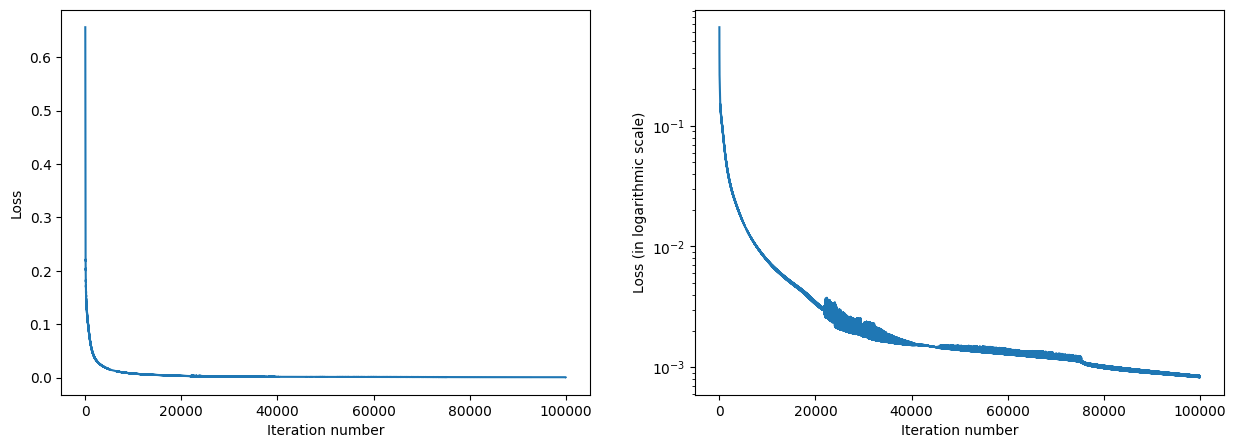

In [45]:
shallow_neural_net_adam.show_losses_over_training()

### Final visualizations and discussion

...

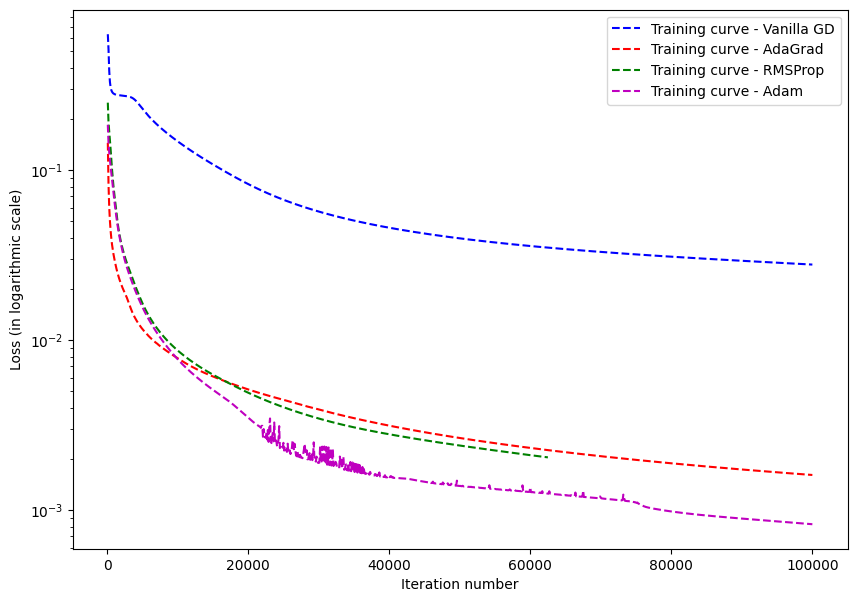

In [46]:
# Compare training curves
fig = plt.figure(figsize = (10, 7))
plt.plot(list(range(0, len(shallow_neural_net_vanilla.losses_list), 100)), \
         shallow_neural_net_vanilla.losses_list[::100], "b--", label = "Training curve - Vanilla GD")
plt.plot(list(range(0, len(shallow_neural_net_adagrad.losses_list), 100)), \
         shallow_neural_net_adagrad.losses_list[::100], "r--", label = "Training curve - AdaGrad")
plt.plot(list(range(0, len(shallow_neural_net_rmsprop.losses_list), 100)), \
         shallow_neural_net_rmsprop.losses_list[::100], "g--", label = "Training curve - RMSProp")
plt.plot(list(range(0, len(shallow_neural_net_adam.losses_list), 100)), \
         shallow_neural_net_adam.losses_list[::100], "m--", label = "Training curve - Adam")
plt.xlabel("Iteration number")
plt.ylabel("Loss (in logarithmic scale)")
plt.yscale("log")
plt.legend(loc = "best")

In [47]:
def find_v2(v1, model, min_val, max_val, thr = 1e-3):
    # Dichotomic search, to be used for boundary drawing later
    v2_min = min_val
    v2_max = max_val
    while((v2_max - v2_min) > thr):
        v2_avg = (v2_max + v2_min)/2
        out = model.forward([v1, v2_avg])
        if(out > 0.5):
            v2_max = v2_avg
        else:
            v2_min = v2_avg
    return (v2_max + v2_min)/2

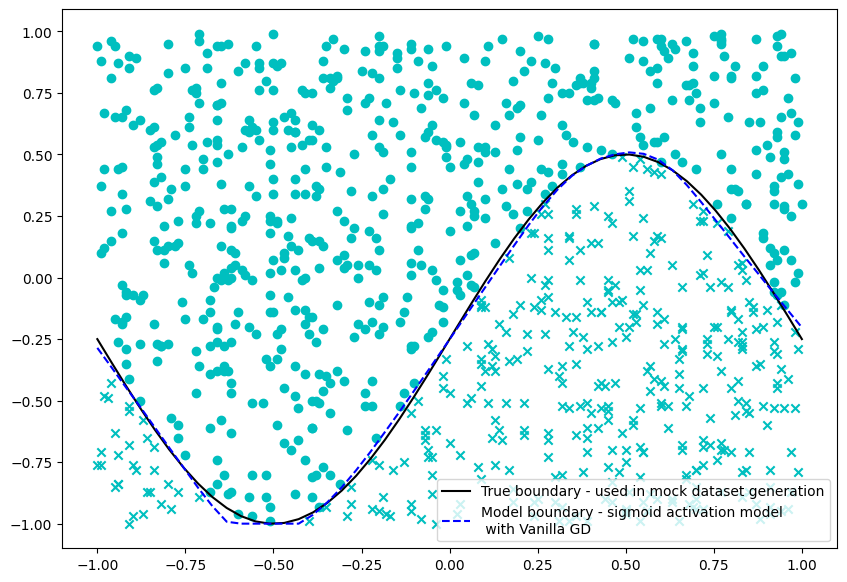

In [48]:
# Initialize plot
fig = plt.figure(figsize = (10, 7))

# Scatter plot
markers = {0: "x", 1: "o"}
colors = {0: "c", 1: "c"}
indexes_0 = np.where(outputs == 0)[0]
v1_0 = val1_list[indexes_0]
v2_0 = val2_list[indexes_0]
indexes_1 = np.where(outputs == 1)[0]
v1_1 = val1_list[indexes_1]
v2_1 = val2_list[indexes_1]
plt.scatter(v1_0, v2_0, c = colors[0], marker = markers[0])
plt.scatter(v1_1, v2_1, c = colors[1], marker = markers[1])

# Display true boundary
x1 = [v1 for v1 in np.linspace(min_val, max_val, 50)]
x2_true = [-1/4 + 3/4*np.sin(v1*np.pi) for v1 in x1]
plt.plot(x1, x2_true, "k", label = "True boundary - used in mock dataset generation")

# Display model boundary (sigmoid model, vanilla GD)
x1 = [v1 for v1 in np.linspace(min_val, max_val, 50)]
x2_model_vanilla = [find_v2(v1, shallow_neural_net_vanilla, min_val, max_val, thr = 1e-3) for v1 in x1]
plt.plot(x1, x2_model_vanilla, "b--", label = "Model boundary - sigmoid activation model \n with Vanilla GD")

# Show
plt.legend(loc = "best")
plt.show()

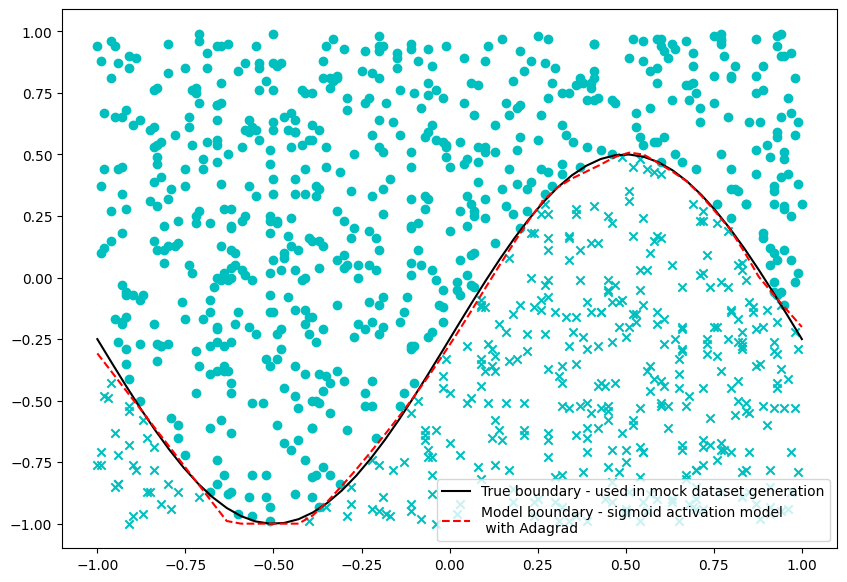

In [49]:
# Initialize plot
fig = plt.figure(figsize = (10, 7))

# Scatter plot
markers = {0: "x", 1: "o"}
colors = {0: "c", 1: "c"}
indexes_0 = np.where(outputs == 0)[0]
v1_0 = val1_list[indexes_0]
v2_0 = val2_list[indexes_0]
indexes_1 = np.where(outputs == 1)[0]
v1_1 = val1_list[indexes_1]
v2_1 = val2_list[indexes_1]
plt.scatter(v1_0, v2_0, c = colors[0], marker = markers[0])
plt.scatter(v1_1, v2_1, c = colors[1], marker = markers[1])

# Display true boundary
x1 = [v1 for v1 in np.linspace(min_val, max_val, 50)]
x2_true = [-1/4 + 3/4*np.sin(v1*np.pi) for v1 in x1]
plt.plot(x1, x2_true, "k", label = "True boundary - used in mock dataset generation")

# Display model boundary (sigmoid model, Adagrad GD)
x1 = [v1 for v1 in np.linspace(min_val, max_val, 50)]
x2_model_adagrad = [find_v2(v1, shallow_neural_net_adagrad, min_val, max_val, thr = 1e-3) for v1 in x1]
plt.plot(x1, x2_model_adagrad, "r--", label = "Model boundary - sigmoid activation model \n with Adagrad")

# Show
plt.legend(loc = "best")
plt.show()

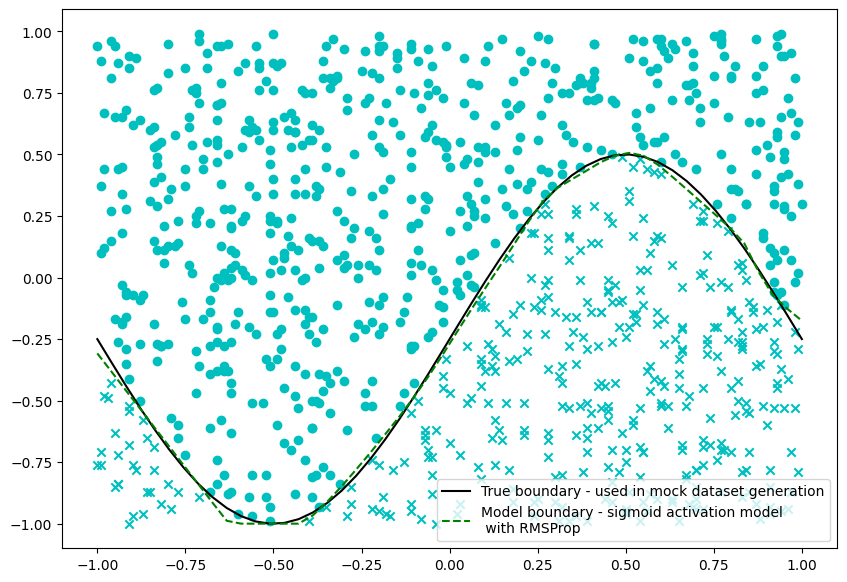

In [50]:
# Initialize plot
fig = plt.figure(figsize = (10, 7))

# Scatter plot
markers = {0: "x", 1: "o"}
colors = {0: "c", 1: "c"}
indexes_0 = np.where(outputs == 0)[0]
v1_0 = val1_list[indexes_0]
v2_0 = val2_list[indexes_0]
indexes_1 = np.where(outputs == 1)[0]
v1_1 = val1_list[indexes_1]
v2_1 = val2_list[indexes_1]
plt.scatter(v1_0, v2_0, c = colors[0], marker = markers[0])
plt.scatter(v1_1, v2_1, c = colors[1], marker = markers[1])

# Display true boundary
x1 = [v1 for v1 in np.linspace(min_val, max_val, 50)]
x2_true = [-1/4 + 3/4*np.sin(v1*np.pi) for v1 in x1]
plt.plot(x1, x2_true, "k", label = "True boundary - used in mock dataset generation")

# Display model boundary (sigmoid model, RMSProp GD)
x1 = [v1 for v1 in np.linspace(min_val, max_val, 50)]
x2_model_rmsprop = [find_v2(v1, shallow_neural_net_rmsprop, min_val, max_val, thr = 1e-3) for v1 in x1]
plt.plot(x1, x2_model_rmsprop, "g--", label = "Model boundary - sigmoid activation model \n with RMSProp")

# Show
plt.legend(loc = "best")
plt.show()

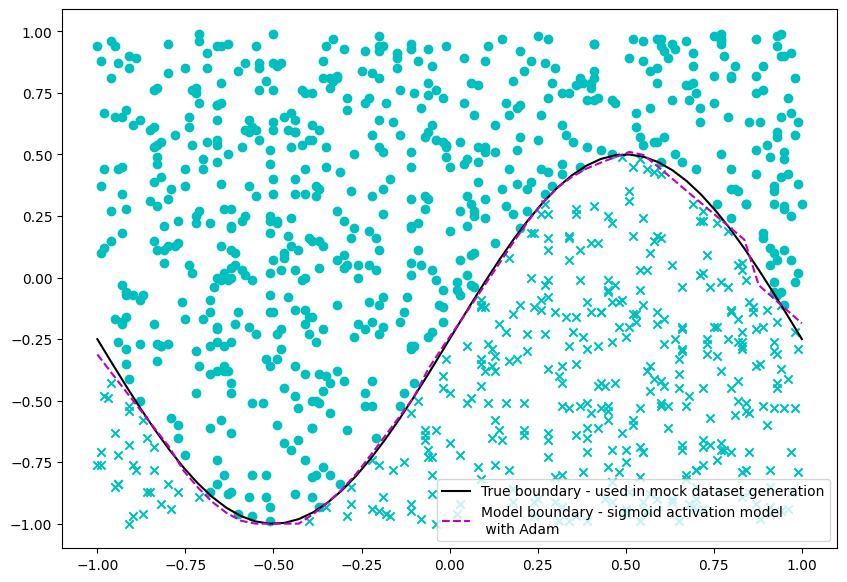

In [51]:
# Initialize plot
fig = plt.figure(figsize = (10, 7))

# Scatter plot
markers = {0: "x", 1: "o"}
colors = {0: "c", 1: "c"}
indexes_0 = np.where(outputs == 0)[0]
v1_0 = val1_list[indexes_0]
v2_0 = val2_list[indexes_0]
indexes_1 = np.where(outputs == 1)[0]
v1_1 = val1_list[indexes_1]
v2_1 = val2_list[indexes_1]
plt.scatter(v1_0, v2_0, c = colors[0], marker = markers[0])
plt.scatter(v1_1, v2_1, c = colors[1], marker = markers[1])

# Display true boundary
x1 = [v1 for v1 in np.linspace(min_val, max_val, 50)]
x2_true = [-1/4 + 3/4*np.sin(v1*np.pi) for v1 in x1]
plt.plot(x1, x2_true, "k", label = "True boundary - used in mock dataset generation")

# Display model boundary (sigmoid model, Adam GD)
x1 = [v1 for v1 in np.linspace(min_val, max_val, 50)]
x2_model_adam = [find_v2(v1, shallow_neural_net_adam, min_val, max_val, thr = 1e-3) for v1 in x1]
plt.plot(x1, x2_model_adam, "m--", label = "Model boundary - sigmoid activation model \n with Adam")

# Show
plt.legend(loc = "best")
plt.show()

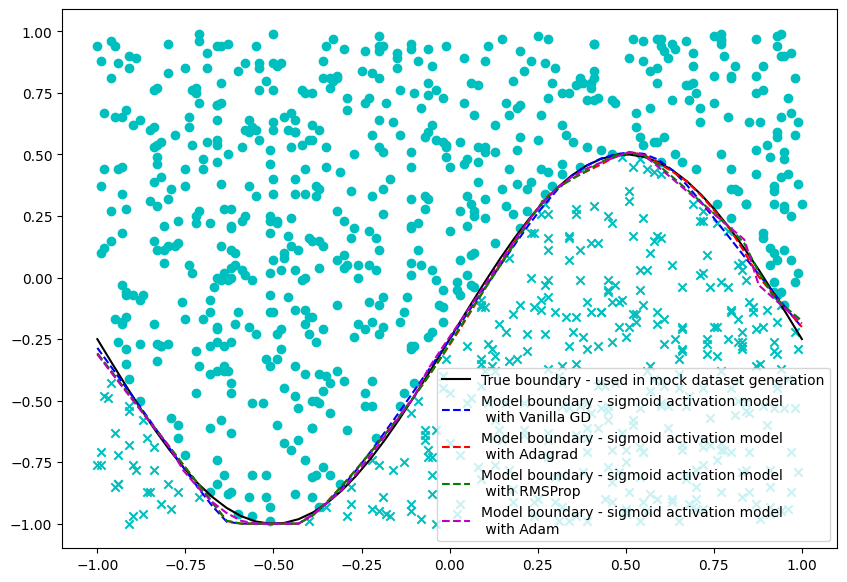

In [52]:
# Initialize plot
fig = plt.figure(figsize = (10, 7))

# Scatter plot
markers = {0: "x", 1: "o"}
colors = {0: "c", 1: "c"}
indexes_0 = np.where(outputs == 0)[0]
v1_0 = val1_list[indexes_0]
v2_0 = val2_list[indexes_0]
indexes_1 = np.where(outputs == 1)[0]
v1_1 = val1_list[indexes_1]
v2_1 = val2_list[indexes_1]
plt.scatter(v1_0, v2_0, c = colors[0], marker = markers[0])
plt.scatter(v1_1, v2_1, c = colors[1], marker = markers[1])

# Display true boundary
x1 = [v1 for v1 in np.linspace(min_val, max_val, 50)]
x2_true = [-1/4 + 3/4*np.sin(v1*np.pi) for v1 in x1]
plt.plot(x1, x2_true, "k", label = "True boundary - used in mock dataset generation")

# Display model boundary (sigmoid model, vanilla GD)
x1 = [v1 for v1 in np.linspace(min_val, max_val, 50)]
x2_model_vanilla = [find_v2(v1, shallow_neural_net_vanilla, min_val, max_val, thr = 1e-3) for v1 in x1]
plt.plot(x1, x2_model_vanilla, "b--", label = "Model boundary - sigmoid activation model \n with Vanilla GD")

# Display model boundary (sigmoid model, Adagrad GD)
x1 = [v1 for v1 in np.linspace(min_val, max_val, 50)]
x2_model_adagrad = [find_v2(v1, shallow_neural_net_adagrad, min_val, max_val, thr = 1e-3) for v1 in x1]
plt.plot(x1, x2_model_adagrad, "r--", label = "Model boundary - sigmoid activation model \n with Adagrad")

# Display model boundary (sigmoid model, RMSProp GD)
x1 = [v1 for v1 in np.linspace(min_val, max_val, 50)]
x2_model_rmsprop = [find_v2(v1, shallow_neural_net_rmsprop, min_val, max_val, thr = 1e-3) for v1 in x1]
plt.plot(x1, x2_model_rmsprop, "g--", label = "Model boundary - sigmoid activation model \n with RMSProp")

# Display model boundary (sigmoid model, Adam GD)
x1 = [v1 for v1 in np.linspace(min_val, max_val, 50)]
x2_model_adam = [find_v2(v1, shallow_neural_net_adam, min_val, max_val, thr = 1e-3) for v1 in x1]
plt.plot(x1, x2_model_adam, "m--", label = "Model boundary - sigmoid activation model \n with Adam")

# Show
plt.legend(loc = "best")
plt.show()

### What's next?

In the next notebook, we will investigate some additional variations on these optimizers, along with the mini-batch optimization procedure.